# Jigar Shah, Hillar Parbo, Anastasiia Sulakova, Chloe Gerak
# Assignment 2 - DATA0006 August 


# Data cleaning

# Weather

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 

In [2]:
# Creating a DataFrame from a csv file
weather = pd.read_csv("weather.csv", encoding = "latin-1") 

In [3]:
# Taking a peek at the data
display(weather)

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,NaN,NaN,SW,44.0,11:36,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,NaN,NaN,SSW,43.0,11:33,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,NaN,NaN,SSW,31.0,8:07,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,NaN,NaN,S,24.0,14:50,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,NaN,NaN,N,31.0,11:58,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,NaN,NaN,SSW,17.0,12:47,...,NaN,NNE,7,1026.8,17.5,58.0,NaN,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,NaN,NaN,SSW,13.0,10:48,...,NaN,NE,6,1030.5,18.6,64.0,NaN,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,NaN,NaN,SSW,22.0,16:09,...,NaN,SW,6,1031.9,18.8,64.0,NaN,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,NaN,NaN,SSW,26.0,15:45,...,NaN,SSE,7,1034.4,17.8,71.0,NaN,SSW,13.0,1032.4


In [4]:
# Checking the shape of the DataFrame
weather.shape

(175, 22)

In [5]:
# Removing the extra whitespace in column headings
weather.columns = weather.columns.str.strip()

In [6]:
# Checking for duplicate rows
weather.duplicated().sum()

0

In [7]:
# Checking for missing values by columns
weather.isnull().sum()

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64

In [8]:
# Dropping columns that are completely empty - 'Evaporation (mm)', 'Sunshine (hours)', 
# '9am cloud amount (oktas)' and '3pm cloud amount (oktas)' 
weather.drop(columns=['Evaporation (mm)', 'Sunshine (hours)', '9am cloud amount (oktas)', '3pm cloud amount (oktas)'], inplace=True)

In [9]:
# Checking for missing values by rows
weather.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
170    0
171    0
172    0
173    0
174    9
Length: 175, dtype: int64

In [10]:
# Row 174 contains 9 missing values, so it is relatively safe to drop it
weather.drop(index=174, inplace=True)

In [11]:
# Checking for any more missing values
weather.isnull().sum() # No missing data

Location                             0
Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Direction of maximum wind gust       0
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind direction                   0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64

In [12]:
# All values in 'Location' column seem identical, checking this assumption
weather['Location'].unique()

array(['Melbourne (Olympic Park), Victoria'], dtype=object)

In [13]:
# Dropping the 'Location' column because it's a constant
weather.drop(columns=['Location'], inplace=True)

In [14]:
# Checking data types for each column
weather.dtypes

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object

In [15]:
# '9am wind speed (km/h)' values are object dtype as opposed to expected numeric;
# Checking unique values of the column
weather['9am wind speed (km/h)'].unique()

array(['13', '9', '6', '4', '15', '17', '11', '7', '24', '19', '22', '20',
       '2', 'Calm'], dtype=object)

In [16]:
# Beaufort Wind Scale: 'Calm' equals to approx 0 km/h, replacing the value with numeric
weather['9am wind speed (km/h)'] = weather['9am wind speed (km/h)'].replace(['Calm'], '0')

In [17]:
# Converting this column and '9am relative humidity (%)' column to float for consistency
weather = weather.astype({'9am wind speed (km/h)':'float', '9am relative humidity (%)':'float'})
weather.dtypes

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am wind direction                    object
9am wind speed (km/h)                float64
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object

In [18]:
# Setting the DataFrame index using Date column
weather = weather.set_index('Date')
weather

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,
1/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64.0,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5
2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65.0,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4
3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70.0,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3
4/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84.0,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6
5/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78.0,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/04/2023,14.4,17.5,1.2,SW,28.0,11:32,14.8,66.0,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1
20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72.0,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5
21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78.0,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2


In [19]:
# Change date to datetime format
weather.index = pd.to_datetime(weather.index, format='%d/%m/%Y')
weather.index = weather.index.strftime('%d/%m/%Y')
weather.head()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,
01/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64.0,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5
02/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65.0,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4
03/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70.0,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3
04/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84.0,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6
05/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78.0,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2


In [20]:
# Checking summary statistics
weather.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
count,174.000000,174.000000,174.000000,174.000000,174.00000,174.00000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,14.072414,23.121839,1.786207,34.563218,17.30000,68.66092,9.298851,1014.363218,21.546552,54.298851,13.045977,1012.819540
std,3.228188,5.419904,4.318081,9.083048,3.55235,12.42294,4.632419,7.008131,5.255205,15.155163,4.246476,6.864583
min,6.900000,13.100000,0.000000,13.000000,10.10000,32.00000,0.000000,991.300000,10.800000,16.000000,2.000000,990.300000
25%,11.700000,19.300000,0.000000,28.000000,14.90000,63.00000,7.000000,1011.100000,18.125000,44.000000,11.000000,1008.900000
50%,14.150000,21.700000,0.000000,33.000000,16.90000,68.00000,9.000000,1014.850000,20.400000,55.500000,13.000000,1012.950000
75%,16.075000,26.275000,1.400000,41.000000,18.70000,76.00000,13.000000,1018.675000,24.275000,64.750000,15.000000,1016.900000
max,25.000000,40.500000,38.400000,59.000000,29.90000,100.00000,24.000000,1034.400000,39.600000,97.000000,28.000000,1032.400000


# Price_and_Demand

In [21]:
price_and_demand = pd.read_csv("price_and_demand.csv", header = None)

In [22]:
# Taking a look at the first 10 rows
price_and_demand.head(10)

,0,1,2,3,4
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
5,VIC1,1/11/2022 3:00,3919.59,1.04,TRADE
6,VIC1,1/11/2022 3:30,3806.64,0.12,TRADE
7,VIC1,1/11/2022 4:00,3794.22,15.95,TRADE
8,VIC1,1/11/2022 4:30,3772.77,0.02,TRADE
9,VIC1,1/11/2022 5:00,3923.90,0.00,TRADE


In [23]:
# Creating headers based on original dataset (AEMO aggregated historical data (http://surl.li/jonpt))
headers = ["Location", "Date & Time", "Total Demand", "Price", "Type"]
price_and_demand.columns = headers

In [24]:
price_and_demand.head()

,Location,Date & Time,Total Demand,Price,Type
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE


In [25]:
# Checking shape 
price_and_demand.shape

(8352, 5)

In [26]:
# Checking for dupplicated rows
price_and_demand.duplicated().sum()

0

In [27]:
# Checking data types
price_and_demand.dtypes

Location         object
Date & Time      object
Total Demand    float64
Price           float64
Type             object
dtype: object

In [28]:
# Check missing values per column
price_and_demand.isna().sum()

Location        0
Date & Time     0
Total Demand    0
Price           0
Type            0
dtype: int64

In [29]:
# All values in 'Region' and 'Period_Type' columns seem identical, checking this assumption
price_and_demand['Location'].unique()

array(['VIC1'], dtype=object)

In [30]:
price_and_demand['Type'].unique()

array(['TRADE'], dtype=object)

In [31]:
# Dropping these columns because they are constants
to_drop = ["Location", "Type"]
price_and_demand.drop(to_drop, inplace=True, axis=1)

In [32]:
price_and_demand.head()

,Date & Time,Total Demand,Price
0,1/11/2022 0:30,4178.18,8.94
1,1/11/2022 1:00,4086.02,0.14
2,1/11/2022 1:30,4033.37,0.02
3,1/11/2022 2:00,3985.64,0.00
4,1/11/2022 2:30,3885.64,0.02


In [33]:
# Splitting Date & Time into different columns
price_and_demand[['Date','Time']] = price_and_demand['Date & Time'].str.split(" ", n=1, expand=True)

In [34]:
# Drop original Data & Time column
to_drop = ["Date & Time"]
price_and_demand.drop(to_drop, inplace=True, axis=1)
price_and_demand.head()

,Total Demand,Price,Date,Time
0,4178.18,8.94,1/11/2022,0:30
1,4086.02,0.14,1/11/2022,1:00
2,4033.37,0.02,1/11/2022,1:30
3,3985.64,0.00,1/11/2022,2:00
4,3885.64,0.02,1/11/2022,2:30


In [35]:
# Setting Date as the index
price_and_demand.set_index("Date", inplace=True)

In [36]:
price_and_demand

,Total Demand,Price,Time
Date,,,
1/11/2022,4178.18,8.94,0:30
1/11/2022,4086.02,0.14,1:00
1/11/2022,4033.37,0.02,1:30
1/11/2022,3985.64,0.00,2:00
1/11/2022,3885.64,0.02,2:30
...,...,...,...
23/04/2023,4717.55,84.09,22:00
23/04/2023,4520.39,81.25,22:30
23/04/2023,4472.49,93.97,23:00


In [37]:
# Removing last row (24-04-23) for consistency with weather dataset
price_and_demand.drop("24/04/2023", inplace=True)

In [38]:
# Counting index values to determine if consistent
index_counts = price_and_demand.index.value_counts()
print(index_counts)

20/03/2023    48
17/01/2023    48
31/03/2023    48
20/02/2023    48
16/12/2022    48
              ..
30/12/2022    48
8/04/2023     48
18/01/2023    48
23/11/2022    48
1/11/2022     47
Name: Date, Length: 174, dtype: int64


In [39]:
# Inserting 1/11/2022 0:00 based on original AEMO aggregated historical data (http://surl.li/jonpt)
newrow = {"Total Demand":4455.59, "Price":44.58, "Time":"0:00"}
newrowdf = pd.DataFrame(newrow, index=["1/11/2022"])
price_and_demand_new = pd.concat([newrowdf, price_and_demand])
price_and_demand_new

,Total Demand,Price,Time
1/11/2022,4455.59,44.58,0:00
1/11/2022,4178.18,8.94,0:30
1/11/2022,4086.02,0.14,1:00
1/11/2022,4033.37,0.02,1:30
1/11/2022,3985.64,0.00,2:00
...,...,...,...
23/04/2023,4792.34,87.43,21:30
23/04/2023,4717.55,84.09,22:00
23/04/2023,4520.39,81.25,22:30
23/04/2023,4472.49,93.97,23:00


In [40]:
# Confirming successful addition
index_counts = price_and_demand_new.index.value_counts()
print(index_counts)

20/03/2023    48
17/01/2023    48
31/03/2023    48
20/02/2023    48
16/12/2022    48
              ..
30/01/2023    48
30/12/2022    48
8/04/2023     48
18/01/2023    48
23/11/2022    48
Length: 174, dtype: int64


In [41]:
# Convert to datetime format to preserve ordering
price_and_demand_new.index = pd.to_datetime(price_and_demand_new.index, dayfirst=True)
price_and_demand_new.index = price_and_demand_new.index.strftime('%d/%m/%Y')
price_and_demand_new.head()

,Total Demand,Price,Time
01/11/2022,4455.59,44.58,0:00
01/11/2022,4178.18,8.94,0:30
01/11/2022,4086.02,0.14,1:00
01/11/2022,4033.37,0.02,1:30
01/11/2022,3985.64,0.00,2:00


In [42]:
price_and_demand_new

,Total Demand,Price,Time
01/11/2022,4455.59,44.58,0:00
01/11/2022,4178.18,8.94,0:30
01/11/2022,4086.02,0.14,1:00
01/11/2022,4033.37,0.02,1:30
01/11/2022,3985.64,0.00,2:00
...,...,...,...
23/04/2023,4792.34,87.43,21:30
23/04/2023,4717.55,84.09,22:00
23/04/2023,4520.39,81.25,22:30
23/04/2023,4472.49,93.97,23:00


In [43]:
# Adding Max Demand and Max Price columns and assigning total value of respective columns for each date
price_and_demand_new['Max Demand'] = price_and_demand_new.groupby(price_and_demand_new.index)['Total Demand'].transform('sum')
price_and_demand_new['Max Price'] = price_and_demand_new.groupby(price_and_demand_new.index)['Price'].transform('sum')
price_and_demand_new.head()

,Total Demand,Price,Time,Max Demand,Max Price
01/11/2022,4455.59,44.58,0:00,211885.05,-132.26
01/11/2022,4178.18,8.94,0:30,211885.05,-132.26
01/11/2022,4086.02,0.14,1:00,211885.05,-132.26
01/11/2022,4033.37,0.02,1:30,211885.05,-132.26
01/11/2022,3985.64,0.00,2:00,211885.05,-132.26


In [44]:
# Removing original columns
to_drop = ["Total Demand", "Price", "Time"]
price_and_demand_new.drop(to_drop, inplace=True, axis=1)

In [45]:
price_and_demand_new.head()

,Max Demand,Max Price
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26


In [46]:
# Setting the index heading to "Date"
price_and_demand_new.index = price_and_demand_new.index.rename("Date")
price_and_demand_new.head()

,Max Demand,Max Price
Date,,
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26


In [47]:
# Dropping duplicate rows so we're left with one row for each day, matching the weather dataset
price_and_demand_new.reset_index(inplace=True)  # Convert the index to a regular column
price_and_demand_new.drop_duplicates(subset='Date', keep='first', inplace=True)  # Drop duplicates based on the 'index' column
price_and_demand_new.set_index('Date', inplace=True)  # Set the 'index' column

In [48]:
price_and_demand_new

,Max Demand,Max Price
Date,,
01/11/2022,211885.05,-132.26
02/11/2022,233630.93,-120.73
03/11/2022,235672.34,3034.04
04/11/2022,224895.28,5325.08
05/11/2022,189190.35,3502.20
...,...,...
19/04/2023,220897.61,4912.03
20/04/2023,227925.10,6273.96
21/04/2023,232043.13,6310.13


In [49]:
# Merging DataFrames based on common index 
df = pd.merge(weather, price_and_demand_new, left_index=True, right_index=True)

In [50]:
display(df)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Max Demand,Max Price
Date,,,,,,,,,,,,,,,,,,
01/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64.0,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,211885.05,-132.26
02/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65.0,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,233630.93,-120.73
03/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70.0,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,235672.34,3034.04
04/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84.0,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,224895.28,5325.08
05/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78.0,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,189190.35,3502.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/04/2023,14.4,17.5,1.2,SW,28.0,11:32,14.8,66.0,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1,220897.61,4912.03
20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72.0,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5,227925.10,6273.96
21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78.0,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2,232043.13,6310.13


In [51]:
# Checking integrity of new DataFrame
index_counts = price_and_demand_new.index.value_counts()
print(index_counts)

19/11/2022    1
05/12/2022    1
12/04/2023    1
10/02/2023    1
21/01/2023    1
             ..
08/11/2022    1
24/03/2023    1
22/01/2023    1
15/12/2022    1
21/11/2022    1
Name: Date, Length: 174, dtype: int64


In [52]:
# Checking for missing values
df.isna().sum()

Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Direction of maximum wind gust       0
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind direction                   0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
Max Demand                           0
Max Price                            0
dtype: int64

In [53]:
# Checking dtypes
df.dtypes

Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am wind direction                    object
9am wind speed (km/h)                float64
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
Max Demand                           float64
Max Price                            float64
dtype: object

In [54]:
display(df)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Max Demand,Max Price
Date,,,,,,,,,,,,,,,,,,
01/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64.0,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,211885.05,-132.26
02/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65.0,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,233630.93,-120.73
03/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70.0,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,235672.34,3034.04
04/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84.0,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,224895.28,5325.08
05/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78.0,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,189190.35,3502.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/04/2023,14.4,17.5,1.2,SW,28.0,11:32,14.8,66.0,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1,220897.61,4912.03
20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72.0,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5,227925.10,6273.96
21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78.0,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2,232043.13,6310.13


In [55]:
df.head(10)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Max Demand,Max Price
Date,,,,,,,,,,,,,,,,,,
01/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64.0,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,211885.05,-132.26
02/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65.0,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,233630.93,-120.73
03/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70.0,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,235672.34,3034.04
04/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84.0,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,224895.28,5325.08
05/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78.0,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,189190.35,3502.20
06/11/2022,11.6,27.1,0.0,NNW,33.0,18:43,17.9,63.0,NNE,9.0,1023.2,26.2,33.0,NW,4.0,1019.9,177519.43,3055.97
07/11/2022,13.9,25.9,0.0,W,24.0,13:42,19.7,64.0,NE,4.0,1021.1,20.2,66.0,WSW,9.0,1019.1,210721.33,4787.06
08/11/2022,14.6,27.6,0.0,NNW,35.0,11:24,21.8,57.0,N,15.0,1018.2,25.8,43.0,SW,6.0,1015.9,215059.09,4118.24
09/11/2022,15.6,29.3,2.8,NNE,35.0,12:24,20.8,67.0,N,13.0,1018.8,28.3,37.0,NNW,13.0,1015.4,216235.49,1224.77


# Data Exploration

In [56]:
# Checking summary statistics of the DataFrame 
df.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Max Demand,Max Price
count,174.000000,174.000000,174.000000,174.000000,174.00000,174.00000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,14.072414,23.121839,1.786207,34.563218,17.30000,68.66092,9.298851,1014.363218,21.546552,54.298851,13.045977,1012.819540,212200.532816,2622.096207
std,3.228188,5.419904,4.318081,9.083048,3.55235,12.42294,4.632419,7.008131,5.255205,15.155163,4.246476,6.864583,20891.472357,2120.692383
min,6.900000,13.100000,0.000000,13.000000,10.10000,32.00000,0.000000,991.300000,10.800000,16.000000,2.000000,990.300000,159249.920000,-2518.380000
25%,11.700000,19.300000,0.000000,28.000000,14.90000,63.00000,7.000000,1011.100000,18.125000,44.000000,11.000000,1008.900000,198263.087500,1102.460000
50%,14.150000,21.700000,0.000000,33.000000,16.90000,68.00000,9.000000,1014.850000,20.400000,55.500000,13.000000,1012.950000,210796.295000,2588.180000
75%,16.075000,26.275000,1.400000,41.000000,18.70000,76.00000,13.000000,1018.675000,24.275000,64.750000,15.000000,1016.900000,225354.227500,4233.325000
max,25.000000,40.500000,38.400000,59.000000,29.90000,100.00000,24.000000,1034.400000,39.600000,97.000000,28.000000,1032.400000,292888.140000,11033.550000


Building a histogram to check distribution of 'Max Demand' Data

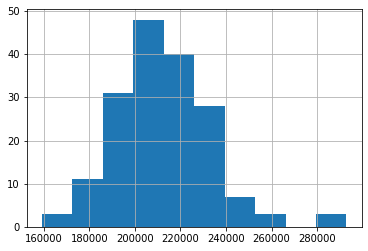

In [57]:
df['Max Demand'].hist()
plt.show()

Building scatterplots to visualise pairwise correlation between 'Max Demand' and weather features

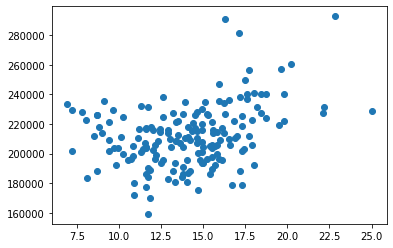

In [58]:
# Scatter Plot of Min Temp and Max Demand
plt.scatter(df['Minimum temperature (°C)'],df['Max Demand'])
plt.show()
# Appears to be some sort of weak positive correlation

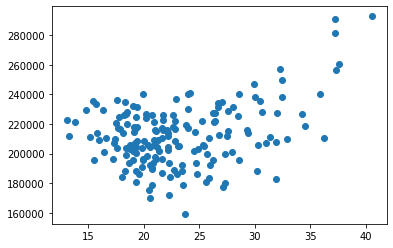

In [59]:
# Scatter Plot of Max Temp and Max Demand
plt.scatter(df['Maximum temperature (°C)'],df['Max Demand'])
plt.show()
# Appears to be some sort of positive correlation

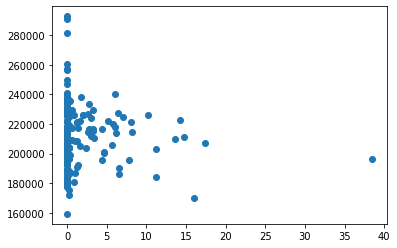

In [60]:
# Scatter Plot of Rainfall and Max Demand
plt.scatter(df['Rainfall (mm)'],df['Max Demand'])
plt.show()
# Appears to be no obvious correlation

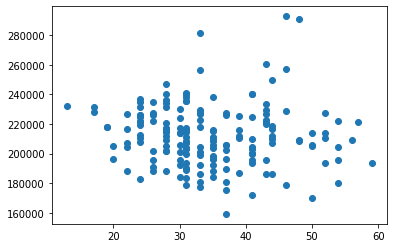

In [61]:
# Scatter Plot of Speed of maximum wind gust (km/h) and Max Demand
plt.scatter(df['Speed of maximum wind gust (km/h)'],df['Max Demand'])
plt.show()
# Appears to be no correlation or very weak negative correlation

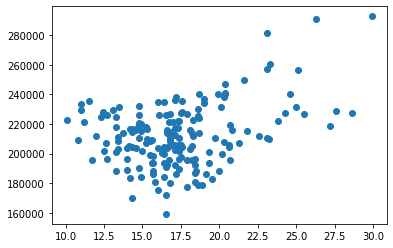

In [62]:
# Scatter Plot of 9am Temperature (°C) and Max Demand
plt.scatter(df['9am Temperature (°C)'],df['Max Demand'])
plt.show()
# Appears to be weak to moderate positive correlation

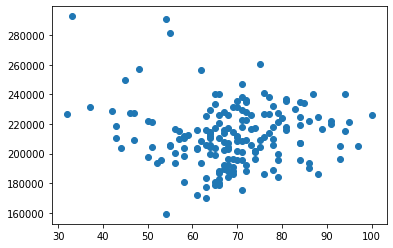

In [63]:
# Scatter Plot of 9am relative humidity (%) and Max Demand
plt.scatter(df['9am relative humidity (%)'],df['Max Demand'])
plt.show()
# Appears to be some sort of weak positive correlation / non-linear


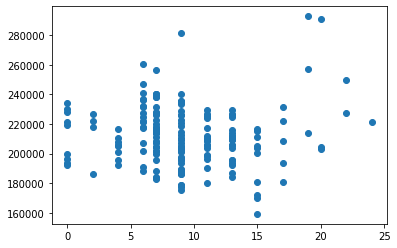

In [64]:
# Scatter Plot of 9am wind speed (km/h) and Max Demand
plt.scatter(df['9am wind speed (km/h)'],df['Max Demand'])
plt.show()
# Appears to be no correlation or extemely weak 

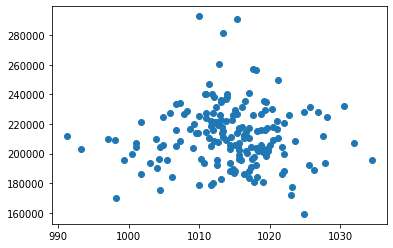

In [65]:
# Scatter Plot of 9am MSL pressure (hPa) and Max Demand
plt.scatter(df['9am MSL pressure (hPa)'],df['Max Demand'])
plt.show()
# Appears to be no correlation

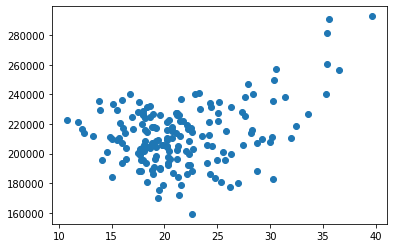

In [66]:
# Scatter Plot of 3pm Temperature (°C) and Max Demand
plt.scatter(df['3pm Temperature (°C)'],df['Max Demand'])
plt.show()
# Appears to be some sort of weak/moderate positive correlation

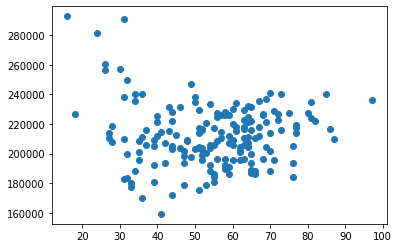

In [67]:
# Scatter Plot of 3pm relative humidity (%) and Max Demand
plt.scatter(df['3pm relative humidity (%)'],df['Max Demand'])
plt.show()
# Appears to be some sort of negative correlation but only towards the low range

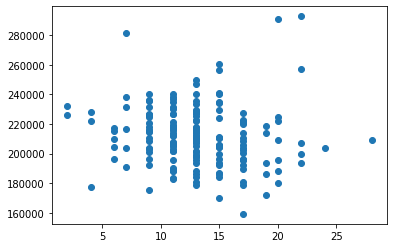

In [68]:
# Scatter Plot of 3pm wind speed (km/h) and Max Demand
plt.scatter(df['3pm wind speed (km/h)'],df['Max Demand'])
plt.show()
# Appears to be no correlation or extemely weak 

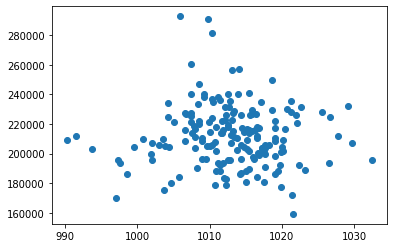

In [69]:
# Scatter Plot of 3pm MSL pressure (hPa) and Max Demand
plt.scatter(df['3pm MSL pressure (hPa)'],df['Max Demand'])
plt.show()
# Appears to be no correlation

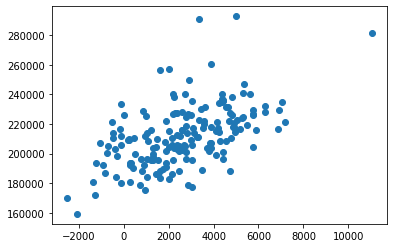

In [70]:
# Scatter Plot of Max Price and Max Demand
plt.scatter(df['Max Price'],df['Max Demand'])
plt.show()
# Appears to be a moderate positive correlation

# Feature Engineering / Feature selection

Pearson correlation

Pearson's correlation with MAX DEMAND


Minimum temperature (°C)             0.340571
Maximum temperature (°C)             0.365345
Rainfall (mm)                       -0.085584
Speed of maximum wind gust (km/h)   -0.056731
9am Temperature (°C)                 0.357189
9am relative humidity (%)           -0.048526
9am wind speed (km/h)                0.022599
9am MSL pressure (hPa)               0.005080
3pm Temperature (°C)                 0.352092
3pm relative humidity (%)           -0.064984
3pm wind speed (km/h)               -0.090560
3pm MSL pressure (hPa)              -0.025875
Max Price                            0.542318
Name: Max Demand, dtype: float64

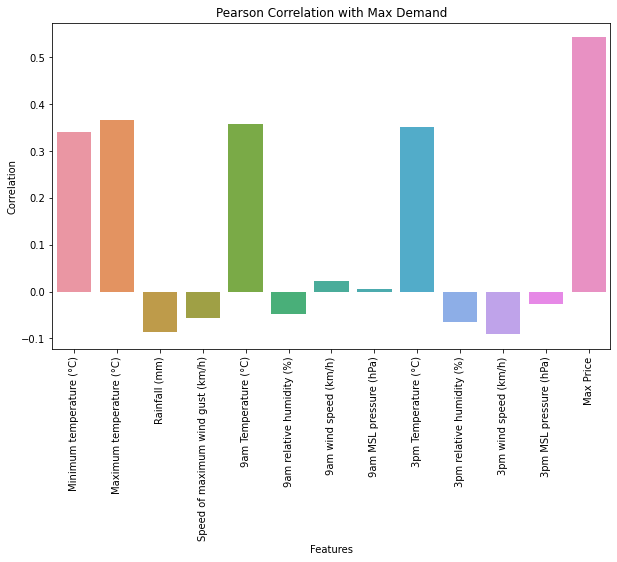

In [71]:
# Drop the "Time of maximum wind gust" column and other non-numeric columns
df_numeric = df.drop(columns=['Time of maximum wind gust', 'Direction of maximum wind gust', '9am wind direction', '3pm wind direction'])

# Get the correlation between each feature and the target variable ("Max Demand")
correlation_with_target = df_numeric.corr()['Max Demand']

# Remove the correlation value of "Max Demand" with itself (which is always 1)
correlation_with_target = correlation_with_target.drop(index='Max Demand')

# Print the correlation results
print("Pearson's correlation with MAX DEMAND")
display(correlation_with_target)

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target)
plt.xticks(rotation=90)
plt.title('Pearson Correlation with Max Demand')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

NMI

In [72]:
import pandas as pd
import numpy as np

# Sort the DataFrame by the "Date" column
df = df.sort_index()

# Define the bin edges for each column
bins_min_temp = np.arange(0, 35, 5)
bins_max_temp = np.arange(5, 46, 5)
bins_rainfall = np.arange(0, 101, 10)
bins_wind_gust = np.arange(0, 101, 10)
bins_9am_temp = np.arange(0, 41, 5)
bins_9am_humidity = np.arange(0, 101, 10)
bins_9am_wind = np.arange(0, 101, 10)
bins_9am_pressure = np.arange(900, 1101, 50)
bins_3pm_temp = np.arange(0, 41, 5)
bins_3pm_humidity = np.arange(0, 101, 10)
bins_3pm_wind = np.arange(0, 101, 10)
bins_3pm_pressure = np.arange(900, 1101, 50)
bins_max_price = np.arange(-2520, 11050, 10)
bins_max_demand = np.arange(150000, 350000, 10000)

# Create the binned DataFrame
df_binned = df.copy()  # Make a copy of the original DataFrame
# making a call to drop wind data . intuition call 
df_binned = df.drop(columns=['Time of maximum wind gust', 'Direction of maximum wind gust', '9am wind direction', '3pm wind direction'])
# Bin the data using pandas' 'cut' function
df_binned['Minimum temperature (°C)'] = pd.cut(df['Minimum temperature (°C)'], bins_min_temp, include_lowest=True)
df_binned['Maximum temperature (°C)'] = pd.cut(df['Maximum temperature (°C)'], bins_max_temp, include_lowest=True, right=False)
df_binned['Rainfall (mm)'] = pd.cut(df['Rainfall (mm)'], bins_rainfall, include_lowest=True)
df_binned['Speed of maximum wind gust (km/h)'] = pd.cut(df['Speed of maximum wind gust (km/h)'], bins_wind_gust, include_lowest=True)
df_binned['9am Temperature (°C)'] = pd.cut(df['9am Temperature (°C)'], bins_9am_temp, include_lowest=True)
df_binned['9am relative humidity (%)'] = pd.cut(df['9am relative humidity (%)'], bins_9am_humidity, include_lowest=True)
df_binned['9am wind speed (km/h)'] = pd.cut(df['9am wind speed (km/h)'], bins_9am_wind, include_lowest=True)
df_binned['9am MSL pressure (hPa)'] = pd.cut(df['9am MSL pressure (hPa)'], bins_9am_pressure, include_lowest=True)
df_binned['3pm Temperature (°C)'] = pd.cut(df['3pm Temperature (°C)'], bins_3pm_temp, include_lowest=True)
df_binned['3pm relative humidity (%)'] = pd.cut(df['3pm relative humidity (%)'], bins_3pm_humidity, include_lowest=True)
df_binned['3pm wind speed (km/h)'] = pd.cut(df['3pm wind speed (km/h)'], bins_3pm_wind, include_lowest=True)
df_binned['3pm MSL pressure (hPa)'] = pd.cut(df['3pm MSL pressure (hPa)'], bins_3pm_pressure, include_lowest=True)
df_binned['Max Price'] = pd.cut(df['Max Price'], bins_max_price, include_lowest=True)
df_binned['Max Demand'] = pd.cut(df['Max Demand'], bins_max_demand, include_lowest=True)

# Display the binned DataFrame
display(df_binned)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Max Demand,Max Price
Date,,,,,,,,,,,,,,
01/01/2023,"(15.0, 20.0]","[35, 40)","(-0.001, 10.0]","(30.0, 40.0]","(20.0, 25.0]","(60.0, 70.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(35.0, 40.0]","(30.0, 40.0]","(10.0, 20.0]","(1000.0, 1050.0]","(240000.0, 250000.0]","(2740.0, 2750.0]"
01/02/2023,"(10.0, 15.0]","[20, 25)","(-0.001, 10.0]","(30.0, 40.0]","(15.0, 20.0]","(60.0, 70.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(15.0, 20.0]","(60.0, 70.0]","(10.0, 20.0]","(1000.0, 1050.0]","(210000.0, 220000.0]","(2600.0, 2610.0]"
01/03/2023,"(10.0, 15.0]","[20, 25)","(-0.001, 10.0]","(20.0, 30.0]","(10.0, 15.0]","(90.0, 100.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(20.0, 25.0]","(60.0, 70.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(210000.0, 220000.0]","(2010.0, 2020.0]"
01/04/2023,"(10.0, 15.0]","[15, 20)","(-0.001, 10.0]","(30.0, 40.0]","(10.0, 15.0]","(70.0, 80.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(10.0, 15.0]","(60.0, 70.0]","(10.0, 20.0]","(1000.0, 1050.0]","(200000.0, 210000.0]","(4420.0, 4430.0]"
01/11/2022,"(5.0, 10.0]","[10, 15)","(-0.001, 10.0]","(40.0, 50.0]","(10.0, 15.0]","(60.0, 70.0]","(10.0, 20.0]","(950.0, 1000.0]","(10.0, 15.0]","(50.0, 60.0]","(10.0, 20.0]","(950.0, 1000.0]","(210000.0, 220000.0]","(-140.0, -130.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2022,"(10.0, 15.0]","[15, 20)","(-0.001, 10.0]","(30.0, 40.0]","(15.0, 20.0]","(50.0, 60.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(15.0, 20.0]","(50.0, 60.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(200000.0, 210000.0]","(3680.0, 3690.0]"
30/12/2022,"(10.0, 15.0]","[25, 30)","(-0.001, 10.0]","(20.0, 30.0]","(15.0, 20.0]","(60.0, 70.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(20.0, 25.0]","(50.0, 60.0]","(10.0, 20.0]","(1000.0, 1050.0]","(190000.0, 200000.0]","(2170.0, 2180.0]"
31/01/2023,"(15.0, 20.0]","[20, 25)","(-0.001, 10.0]","(20.0, 30.0]","(15.0, 20.0]","(60.0, 70.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(20.0, 25.0]","(50.0, 60.0]","(10.0, 20.0]","(1000.0, 1050.0]","(210000.0, 220000.0]","(2830.0, 2840.0]"


In [73]:
df = df[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 'Speed of maximum wind gust (km/h)',
         '9am Temperature (°C)', '9am relative humidity (%)', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
         '3pm Temperature (°C)', '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)',
         'Max Price', 'Max Demand']]
df_binned = df_binned[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 'Speed of maximum wind gust (km/h)',
         '9am Temperature (°C)', '9am relative humidity (%)', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
         '3pm Temperature (°C)', '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)',
         'Max Price', 'Max Demand']]

In [74]:
display(df_binned)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Max Price,Max Demand
Date,,,,,,,,,,,,,,
01/01/2023,"(15.0, 20.0]","[35, 40)","(-0.001, 10.0]","(30.0, 40.0]","(20.0, 25.0]","(60.0, 70.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(35.0, 40.0]","(30.0, 40.0]","(10.0, 20.0]","(1000.0, 1050.0]","(2740.0, 2750.0]","(240000.0, 250000.0]"
01/02/2023,"(10.0, 15.0]","[20, 25)","(-0.001, 10.0]","(30.0, 40.0]","(15.0, 20.0]","(60.0, 70.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(15.0, 20.0]","(60.0, 70.0]","(10.0, 20.0]","(1000.0, 1050.0]","(2600.0, 2610.0]","(210000.0, 220000.0]"
01/03/2023,"(10.0, 15.0]","[20, 25)","(-0.001, 10.0]","(20.0, 30.0]","(10.0, 15.0]","(90.0, 100.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(20.0, 25.0]","(60.0, 70.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(2010.0, 2020.0]","(210000.0, 220000.0]"
01/04/2023,"(10.0, 15.0]","[15, 20)","(-0.001, 10.0]","(30.0, 40.0]","(10.0, 15.0]","(70.0, 80.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(10.0, 15.0]","(60.0, 70.0]","(10.0, 20.0]","(1000.0, 1050.0]","(4420.0, 4430.0]","(200000.0, 210000.0]"
01/11/2022,"(5.0, 10.0]","[10, 15)","(-0.001, 10.0]","(40.0, 50.0]","(10.0, 15.0]","(60.0, 70.0]","(10.0, 20.0]","(950.0, 1000.0]","(10.0, 15.0]","(50.0, 60.0]","(10.0, 20.0]","(950.0, 1000.0]","(-140.0, -130.0]","(210000.0, 220000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2022,"(10.0, 15.0]","[15, 20)","(-0.001, 10.0]","(30.0, 40.0]","(15.0, 20.0]","(50.0, 60.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(15.0, 20.0]","(50.0, 60.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(3680.0, 3690.0]","(200000.0, 210000.0]"
30/12/2022,"(10.0, 15.0]","[25, 30)","(-0.001, 10.0]","(20.0, 30.0]","(15.0, 20.0]","(60.0, 70.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(20.0, 25.0]","(50.0, 60.0]","(10.0, 20.0]","(1000.0, 1050.0]","(2170.0, 2180.0]","(190000.0, 200000.0]"
31/01/2023,"(15.0, 20.0]","[20, 25)","(-0.001, 10.0]","(20.0, 30.0]","(15.0, 20.0]","(60.0, 70.0]","(-0.001, 10.0]","(1000.0, 1050.0]","(20.0, 25.0]","(50.0, 60.0]","(10.0, 20.0]","(1000.0, 1050.0]","(2830.0, 2840.0]","(210000.0, 220000.0]"


                                   NMI with Max Demand
Minimum temperature (°C)                      0.109169
Maximum temperature (°C)                      0.138930
Rainfall (mm)                                 0.026243
Speed of maximum wind gust (km/h)             0.075218
9am Temperature (°C)                          0.125216
9am relative humidity (%)                     0.115630
9am wind speed (km/h)                         0.064317
9am MSL pressure (hPa)                        0.020346
3pm Temperature (°C)                          0.125099
3pm relative humidity (%)                     0.159129
3pm wind speed (km/h)                         0.077343
3pm MSL pressure (hPa)                        0.021837
Max Price                                     0.536882


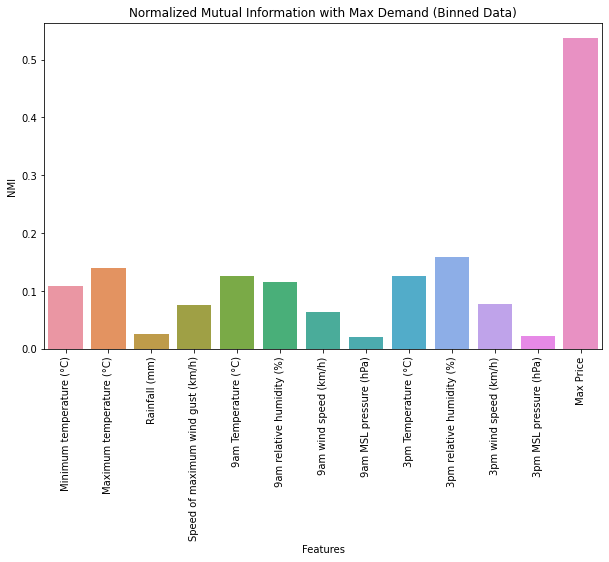

In [75]:
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the binned DataFrame to use for NMI calculation
df_numeric_binned = df_binned.copy()

# Now, calculate the NMI for each numeric feature with the target variable
nmi_results = {}
for column in df_numeric_binned.columns[:-1]:  # Exclude the target column from the loop
    nmi = normalized_mutual_info_score(df_numeric_binned[column], df_numeric_binned['Max Demand'])
    nmi_results[column] = nmi

# Create a new DataFrame to store the NMI values
nmi_df = pd.DataFrame.from_dict(nmi_results, orient='index', columns=['NMI with Max Demand'])

# Print the NMI results
print(nmi_df)

# Plot the NMI values
plt.figure(figsize=(10, 6))
sns.barplot(x=nmi_df.index, y=nmi_df['NMI with Max Demand'])
plt.xticks(rotation=90)
plt.title('Normalized Mutual Information with Max Demand (Binned Data)')
plt.xlabel('Features')
plt.ylabel('NMI')
plt.show()

In [76]:
# Based on Pearson correlation, '9am MSL pressure (hPa)' and '3pm MSL pressure (hPa)' displayed lowest correlation 
# with the target variable. MNI feature analysis also displayed that the amount of information
# shared between these features and 'Max Demand' was the lowest, therefore, it was decided to drop these columns

df_numeric = df_numeric.drop(columns=['9am MSL pressure (hPa)', '3pm MSL pressure (hPa)'])
display(df_numeric)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),Max Demand,Max Price
Date,,,,,,,,,,,,
01/11/2022,8.5,13.3,3.0,44.0,12.0,64.0,13.0,13.2,59.0,11.0,211885.05,-132.26
02/11/2022,6.9,15.7,2.8,43.0,11.0,65.0,9.0,15.1,54.0,13.0,233630.93,-120.73
03/11/2022,9.1,15.4,0.4,31.0,11.5,70.0,9.0,13.8,67.0,9.0,235672.34,3034.04
04/11/2022,10.2,17.8,0.2,24.0,12.3,84.0,6.0,16.9,56.0,9.0,224895.28,5325.08
05/11/2022,11.8,22.7,0.0,31.0,14.0,78.0,9.0,18.8,65.0,11.0,189190.35,3502.20
...,...,...,...,...,...,...,...,...,...,...,...,...
19/04/2023,14.4,17.5,1.2,28.0,14.8,66.0,9.0,15.8,53.0,9.0,220897.61,4912.03
20/04/2023,7.8,18.5,0.0,17.0,12.4,72.0,7.0,17.5,58.0,4.0,227925.10,6273.96
21/04/2023,11.3,19.0,0.0,13.0,14.8,78.0,6.0,18.6,64.0,2.0,232043.13,6310.13


Classification 

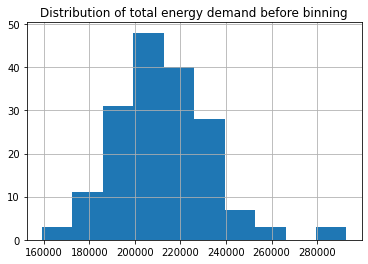

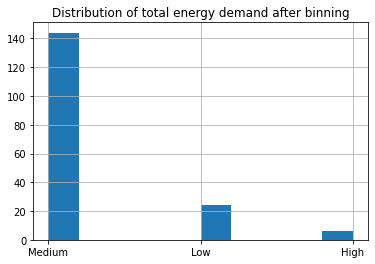

In [77]:
# To build a classification model we need to discretise the target variable 'Max Demand'

target_variable = df['Max Demand']

# visualise distribution of total energy demand before binning
plt.title('Distribution of total energy demand before binning')
target_variable.hist()
plt.show()

# Discretize target column into 3 bins based on domain knowledge
bins = [0, 190000, 250000, 300000]
labels = ['Low', 'Medium', 'High']

# Convert the target variable to classes based on the new bins
target_variable_binned = pd.cut(target_variable, bins=bins, labels=labels)

# visualise distribution of total energy demand after binning
plt.title('Distribution of total energy demand after binning')
target_variable_binned.hist()
plt.show()

# we clearly see that data is distributed unevenly between the bins that will affect effectiveness of the model

Classification model with DTC Algorithm

Decision Tree Classification Accuracy: 0.7142857142857143


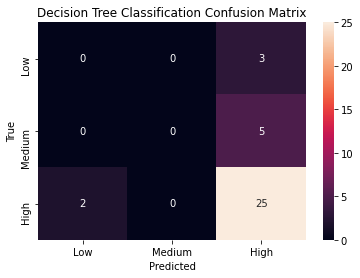

Decision Tree Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         3
         Low       1.00      0.00      0.00         5
      Medium       0.76      0.93      0.83        27

    accuracy                           0.71        35
   macro avg       0.59      0.31      0.28        35
weighted avg       0.73      0.71      0.64        35



In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Select all numeric columns as features
features = df_numeric.drop(columns=['Max Demand'])

# Convert the target variable to classes based on the new bins
classlabel = target_variable_binned

# Split the data into training and testing sets with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(features, classlabel, test_size=0.20, random_state=44)

# Train the Decision Tree Classification model
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=44, max_depth=5)
decision_tree_classifier.fit(X_train, y_train)

# Predict on the test set using the Decision Tree model
y_pred_dt_cls = decision_tree_classifier.predict(X_test)

# Evaluate the Decision Tree model's accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt_cls)

# Print the accuracy of the Decision Tree classifier
print("Decision Tree Classification Accuracy:", accuracy_dt)

# Generate a confusion matrix for the Decision Tree Classifier
cm_dt = confusion_matrix(y_test, y_pred_dt_cls)

# Plot the confusion matrix as a heatmap with class labels
sns.heatmap(cm_dt, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Classification Confusion Matrix')
plt.show()

# Print the classification report for the Decision Tree Classifier
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_cls, zero_division=1))

DTC with PCA

(139, 4)
Variance explained by total PC 0.8010492035790225
Decision Tree Classification Accuracy: 0.8


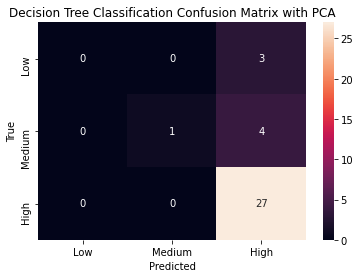

Decision Tree Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.00      0.00         3
         Low       1.00      0.20      0.33         5
      Medium       0.79      1.00      0.89        27

    accuracy                           0.80        35
   macro avg       0.93      0.40      0.41        35
weighted avg       0.84      0.80      0.73        35



In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Select all numeric columns as features
features = df_numeric.drop(columns=['Max Demand'])

# Convert the target variable to classes based on the new bins
classlabel = target_variable_binned

# Split the data into training and testing sets with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(features, classlabel, test_size=0.20, random_state=44)

#Scale
scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)   #checking dimentions of the new 'PCA-ed' dataset
print("Variance explained by total PC", pca.explained_variance_ratio_.sum())    #checking the amount of variance explained by total PC

# Train the Decision Tree Classification model
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=44, max_depth=5)
decision_tree_classifier.fit(X_train, y_train)

# Predict on the test set using the Decision Tree model
y_pred_dt_cls = decision_tree_classifier.predict(X_test)

# Evaluate the Decision Tree model's accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt_cls)

# Print the accuracy of the Decision Tree classifier
print("Decision Tree Classification Accuracy:", accuracy_dt)

# Generate a confusion matrix for the Decision Tree Classifier
cm_dt = confusion_matrix(y_test, y_pred_dt_cls)

# Plot the confusion matrix as a heatmap with class labels
sns.heatmap(cm_dt, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Classification Confusion Matrix with PCA')
plt.show()

# Print the classification report for the Decision Tree Classifier
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_cls, zero_division=1))

# Having tried a different number of feature combinations, it was discovered that accuracy of the model varies 
# from 0.63 at 8 and 9 number of components to 0.8 at 4 'new' features.

Decision Tree Visualisation

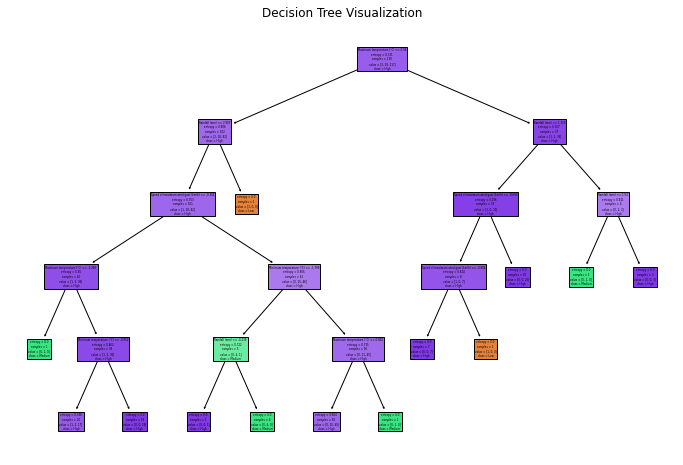

In [80]:
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_classifier, feature_names=features.columns, class_names=labels, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

DTC with KFOLD

Decision Tree Cross-Validation Accuracy Scores: [0.71428571 0.82857143 0.74285714 0.85714286 0.70588235]
Decision Tree Cross-Validation Mean Accuracy: 0.7697478991596639
Decision Tree Cross-Validation Accuracy Standard Deviation: 0.06160529362423385
Decision Tree Classification Accuracy: 0.8


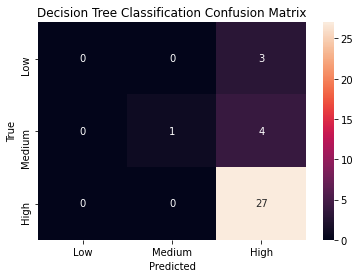

Decision Tree Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.00      0.00         3
         Low       1.00      0.20      0.33         5
      Medium       0.79      1.00      0.89        27

    accuracy                           0.80        35
   macro avg       0.93      0.40      0.41        35
weighted avg       0.84      0.80      0.73        35



In [81]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Select all numeric columns as features
features = df_numeric.drop(columns=['Max Demand'])
# Convert the target variable to classes based on the new bins
classlabel = target_variable_binned

# Train the Decision Tree Classification model
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=44, max_depth=5)

# Perform k-fold cross-validation for Decision Tree
kf = KFold(n_splits=5, shuffle=True, random_state=44)
accuracy_scores_dt = cross_val_score(decision_tree_classifier, features, classlabel, cv=kf)

# Print cross-validation accuracy scores for Decision Tree
print("Decision Tree Cross-Validation Accuracy Scores:", accuracy_scores_dt)

# Calculate mean accuracy and standard deviation
mean_accuracy_dt = accuracy_scores_dt.mean()
std_accuracy_dt = accuracy_scores_dt.std()

print("Decision Tree Cross-Validation Mean Accuracy:", mean_accuracy_dt)
print("Decision Tree Cross-Validation Accuracy Standard Deviation:", std_accuracy_dt)

# Split the data into training and testing sets with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(features, classlabel, test_size=0.20, random_state=44)

#Scale
scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Train the Decision Tree model on the entire training data
decision_tree_classifier.fit(X_train, y_train)

# Predict on the test set using the Decision Tree model
y_pred_dt_cls = decision_tree_classifier.predict(X_test)

# Evaluate the Decision Tree model's accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt_cls)

# Print the accuracy of the Decision Tree classifier
print("Decision Tree Classification Accuracy:", accuracy_dt)

# Generate a confusion matrix for the Decision Tree Classifier
cm_dt = confusion_matrix(y_test, y_pred_dt_cls)

# Plot the confusion matrix as a heatmap with class labels
sns.heatmap(cm_dt, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Classification Confusion Matrix')
plt.show()

# Print the classification report for the Decision Tree Classifier
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_cls, zero_division=1))

Classification Model with KNN Algorithm

KNN Classification Accuracy: 0.6571428571428571


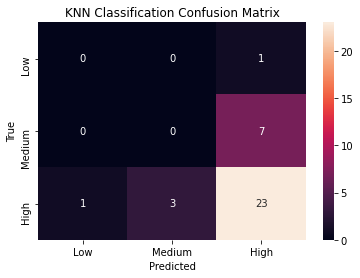

KNN Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.00      0.00      0.00         7
      Medium       0.74      0.85      0.79        27

    accuracy                           0.66        35
   macro avg       0.25      0.28      0.26        35
weighted avg       0.57      0.66      0.61        35



In [82]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_numeric.drop(columns=['Max Demand'])
y = target_variable_binned

# Split the data into training and testing sets with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Train the KNN Classification model
knn_classifier = KNeighborsClassifier(n_neighbors=3)   #taking arbitrary k = 3
knn_classifier.fit(X_train, y_train)

# Predict on the test set for the KNN model
y_pred_knn_cls = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn_cls)

print("KNN Classification Accuracy:", accuracy_knn)

# Confusion matrix for KNN Classifier
cm_knn = confusion_matrix(y_test, y_pred_knn_cls)
sns.heatmap(cm_knn, annot=True, fmt='d',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Classification Confusion Matrix')
plt.show()

# Classification report for KNN Classifier
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_cls, zero_division=1))

Building an accuracy plot to find the best K value

Maximum accuracy:- 0.7714285714285715 at K = 7


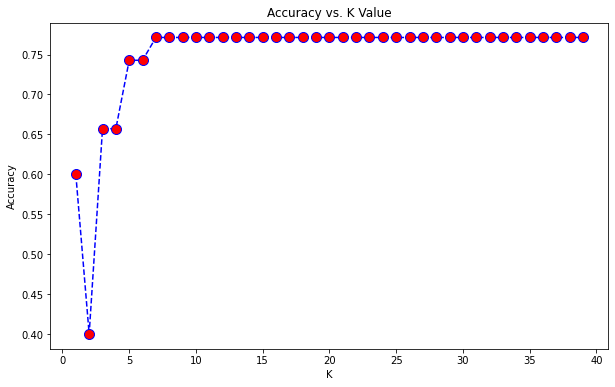

In [83]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


accuracy = []
for i in range(1,40):    #checking accuracy rate with different K values, arbitrary range 1-40
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred_knn_cls = neigh.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred_knn_cls))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accuracy),"at K =",accuracy.index(max(accuracy))+1)

KNN Classification Accuracy: 0.7714285714285715


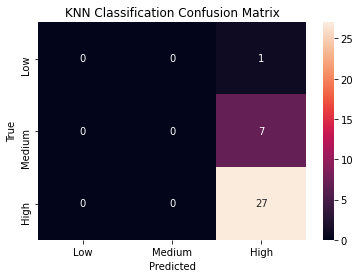

KNN Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.00      0.00         1
         Low       1.00      0.00      0.00         7
      Medium       0.77      1.00      0.87        27

    accuracy                           0.77        35
   macro avg       0.92      0.33      0.29        35
weighted avg       0.82      0.77      0.67        35



In [84]:
# KNN model with the best K value found (k = 7)

X = df_numeric.drop(columns=['Max Demand'])
y = target_variable_binned

# # Split the data into training and testing sets with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Scale 
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Train the KNN Classification model
knn_classifier = KNeighborsClassifier(n_neighbors=7)   
knn_classifier.fit(X_train, y_train)

# Predict on the test set for the KNN model
y_pred_knn_cls = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn_cls)

print("KNN Classification Accuracy:", accuracy_knn)

# Confusion matrix for KNN Classifier
cm_knn = confusion_matrix(y_test, y_pred_knn_cls)
sns.heatmap(cm_knn, annot=True, fmt='d',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Classification Confusion Matrix')
plt.show()

# Classification report for KNN Classifier
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_cls, zero_division=1))

KNN with PCA

(139, 5)
Variance explained by total PC 0.8853024744263932
KNN Classification Accuracy: 0.7714285714285715


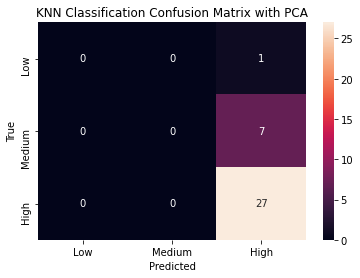

KNN Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.00      0.00         1
         Low       1.00      0.00      0.00         7
      Medium       0.77      1.00      0.87        27

    accuracy                           0.77        35
   macro avg       0.92      0.33      0.29        35
weighted avg       0.82      0.77      0.67        35



In [85]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

X = df_numeric.drop(columns=['Max Demand'])
y = target_variable_binned

# Split the data into training and testing sets with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale
scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)   #checking dimentions of the new 'PCA-ed' dataset
print("Variance explained by total PC", pca.explained_variance_ratio_.sum())    #checking the amount of variance explained by total PC

# Train the KNN Classification model
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

# Predict on the test set for the KNN model
y_pred_knn_cls = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn_cls)

print("KNN Classification Accuracy:", accuracy_knn)

# Confusion matrix for KNN Classifier
cm_knn = confusion_matrix(y_test, y_pred_knn_cls)
sns.heatmap(cm_knn, annot=True, fmt='d',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Classification Confusion Matrix with PCA')
plt.show()

# Classification report for KNN Classifier
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_cls, zero_division=1))

# Having tried a different number of feature combinations, it was discovered the result is not significantly 
# affected by different combinations of features. Wrost number of 'new' features is 1 and 2. It was decided to keep 5 components.

##### KNN model with KFOLD

KNN Cross-Validation Accuracy Scores: [0.77142857 0.71428571 0.91428571 0.74285714 0.85294118]
KNN Cross-Validation Mean Accuracy: 0.7991596638655463
KNN Cross-Validation Accuracy Standard Deviation: 0.07387696970012096
KNN Classification Accuracy: 0.7714285714285715


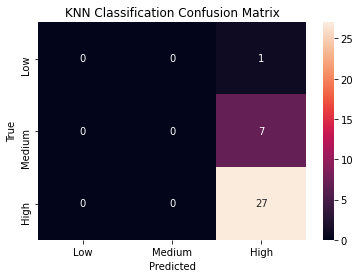

KNN Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.00      0.00         1
         Low       1.00      0.00      0.00         7
      Medium       0.77      1.00      0.87        27

    accuracy                           0.77        35
   macro avg       0.92      0.33      0.29        35
weighted avg       0.82      0.77      0.67        35



In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

X = df_numeric.drop(columns=['Max Demand'])
y = target_variable_binned

scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# # Create a KNN Classifier instance
knn_classifier = KNeighborsClassifier(n_neighbors=7)

# Perform k-fold cross-validation for KNN
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores_knn = cross_val_score(knn_classifier, X, y, cv=kf)

# Print cross-validation accuracy scores for KNN
print("KNN Cross-Validation Accuracy Scores:", accuracy_scores_knn)

# Calculate mean accuracy and standard deviation
mean_accuracy_knn = accuracy_scores_knn.mean()
std_accuracy_knn = accuracy_scores_knn.std()

print("KNN Cross-Validation Mean Accuracy:", mean_accuracy_knn)
print("KNN Cross-Validation Accuracy Standard Deviation:", std_accuracy_knn)

# Split the data into training and testing sets with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the KNN model on the entire training data
knn_classifier.fit(X_train, y_train)

# Predict on the test set using the KNN model
y_pred_knn_cls = knn_classifier.predict(X_test)

# Evaluate the KNN model's accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn_cls)

# Print the accuracy of the KNN classifier
print("KNN Classification Accuracy:", accuracy_knn)

# Generate a confusion matrix for the KNN Classifier
cm_knn = confusion_matrix(y_test, y_pred_knn_cls)

# Plot the confusion matrix as a heatmap with class labels
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Classification Confusion Matrix')
plt.show()

# Print the classification report for the KNN Classifier
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_cls, zero_division=1))